<a href="https://colab.research.google.com/github/atenakarimi/Atena-Karimi-Data-visualization-project/blob/main/Emotion-Aware%20Movie%20Recommendation%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip  "/content/drive/My Drive/semister 2 uni lu/Deep learning project/CK+.zip" -d "/content/"

Archive:  /content/drive/My Drive/semister 2 uni lu/Deep learning project/CK+.zip
   creating: /content/surprise/
  inflating: /content/surprise/S010_002_00000014.png  
  inflating: /content/surprise/S011_001_00000016.png  
  inflating: /content/surprise/S014_001_00000029.png  
  inflating: /content/surprise/S022_001_00000030.png  
  inflating: /content/surprise/S026_001_00000015.png  
  inflating: /content/surprise/S032_001_00000022.png  
  inflating: /content/surprise/S034_001_00000029.png  
  inflating: /content/surprise/S035_001_00000015.png  
  inflating: /content/surprise/S037_001_00000020.png  
  inflating: /content/surprise/S042_001_00000019.png  
  inflating: /content/surprise/S044_001_00000024.png  
  inflating: /content/surprise/S046_002_00000006.png  
  inflating: /content/surprise/S050_002_00000018.png  
  inflating: /content/surprise/S051_002_00000019.png  
  inflating: /content/surprise/S052_001_00000015.png  
  inflating: /content/surprise/S053_001_00000023.png  
  infl

In [ ]:
!unzip "/content/drive/My Drive/semister 2 uni lu/Deep learning project/jaffe.zip" -d "/content/jaffe"

Archive:  /content/drive/My Drive/semister 2 uni lu/Deep learning project/jaffe.zip
   creating: /content/jaffe/jaffe/
  inflating: /content/jaffe/jaffe/MK.AN3.127.tiff  
  inflating: /content/jaffe/jaffe/MK.NE1.113.tiff  
  inflating: /content/jaffe/jaffe/YM.AN3.63.tiff  
  inflating: /content/jaffe/jaffe/MK.SA1.119.tiff  
  inflating: /content/jaffe/jaffe/KA.AN1.39.tiff  
  inflating: /content/jaffe/jaffe/KA.SU2.37.tiff  
  inflating: /content/jaffe/jaffe/YM.NE2.50.tiff  
  inflating: /content/jaffe/jaffe/TM.HA2.181.tiff  
  inflating: /content/jaffe/jaffe/NA.FE2.218.tiff  
  inflating: /content/jaffe/jaffe/YM.NE3.51.tiff  
  inflating: /content/jaffe/jaffe/MK.DI1.128.tiff  
  inflating: /content/jaffe/jaffe/YM.AN2.62.tiff  
  inflating: /content/jaffe/jaffe/KL.AN2.168.tiff  
  inflating: /content/jaffe/jaffe/YM.HA2.53.tiff  
  inflating: /content/jaffe/jaffe/NA.AN2.212.tiff  
  inflating: /content/jaffe/jaffe/KM.SA5.13.tiff  
  inflating: /content/jaffe/jaffe/UY.FE1.152.tiff  
  inf

In [ ]:
from collections import Counter


# Count class indices
class_counts = Counter(dataset.targets)

# Map indices to class names
idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}

print("Number of images per class:")
for class_idx, count in class_counts.items():
    print(f"{idx_to_class[class_idx]}: {count}")


Number of images per class:
anger: 75
disgust: 106
fear: 57
happiness: 100
neutral: 623
sadness: 59
surprise: 113


Model without
imbalance handling

Here is your full code with all class imbalance handling removed. Specifically, I have:

Removed the WeightedRandomSampler.

Removed class_weights and criterion adjustments.

Reverted to using standard CrossEntropyLoss.

Retained the overall structure, transforms, data augmentation, and MixUp.

Epoch 1, Train Loss: 1.7758, Train Acc: 34.85%, Val Loss: 1.4958, Val Acc: 53.85%
Epoch 2, Train Loss: 1.4269, Train Acc: 54.36%, Val Loss: 1.3619, Val Acc: 53.85%
Epoch 3, Train Loss: 1.2227, Train Acc: 58.16%, Val Loss: 1.2085, Val Acc: 58.24%
Epoch 4, Train Loss: 1.0463, Train Acc: 63.68%, Val Loss: 1.0344, Val Acc: 64.84%
Epoch 5, Train Loss: 0.9293, Train Acc: 70.67%, Val Loss: 0.9572, Val Acc: 68.13%
Epoch 6, Train Loss: 0.7915, Train Acc: 75.34%, Val Loss: 0.8811, Val Acc: 71.43%
Epoch 7, Train Loss: 0.7095, Train Acc: 78.04%, Val Loss: 0.7780, Val Acc: 71.43%
Epoch 8, Train Loss: 0.6314, Train Acc: 78.90%, Val Loss: 0.7371, Val Acc: 73.63%
Epoch 9, Train Loss: 0.5318, Train Acc: 82.09%, Val Loss: 0.7055, Val Acc: 72.53%
Epoch 10, Train Loss: 0.4815, Train Acc: 84.79%, Val Loss: 0.6384, Val Acc: 78.02%
Epoch 11, Train Loss: 0.4422, Train Acc: 84.05%, Val Loss: 0.7038, Val Acc: 74.73%
Epoch 12, Train Loss: 0.3965, Train Acc: 87.36%, Val Loss: 0.6090, Val Acc: 76.92%
Epoch 13, Tra

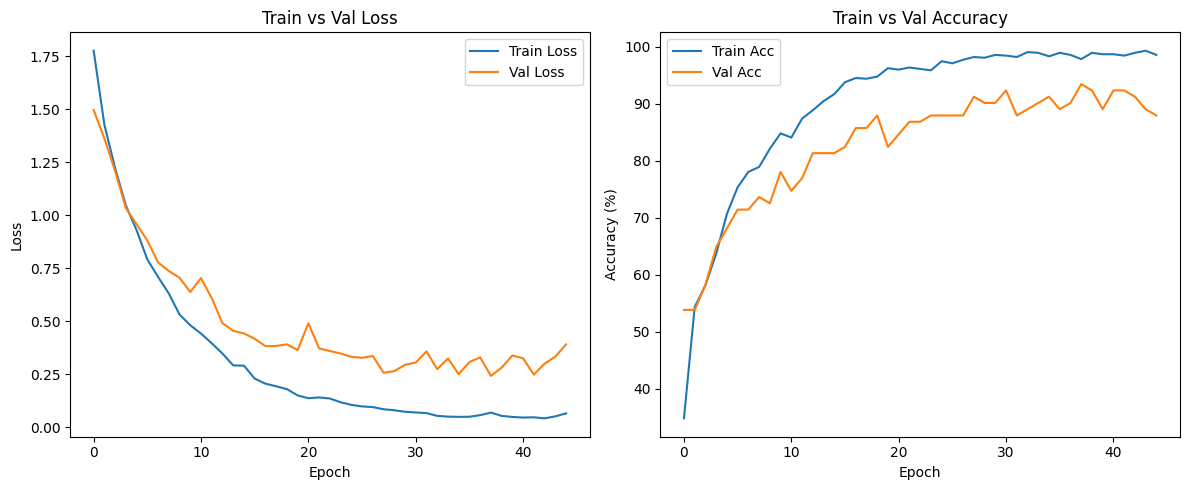

Classification Report:
              precision    recall  f1-score   support

       anger       0.80      0.75      0.77        16
     disgust       0.67      0.71      0.69        17
        fear       0.57      0.57      0.57         7
   happiness       1.00      1.00      1.00        24
     neutral       0.98      0.94      0.96       124
     sadness       0.38      0.67      0.48         9
    surprise       0.96      0.90      0.93        30

    accuracy                           0.89       227
   macro avg       0.77      0.79      0.77       227
weighted avg       0.91      0.89      0.90       227



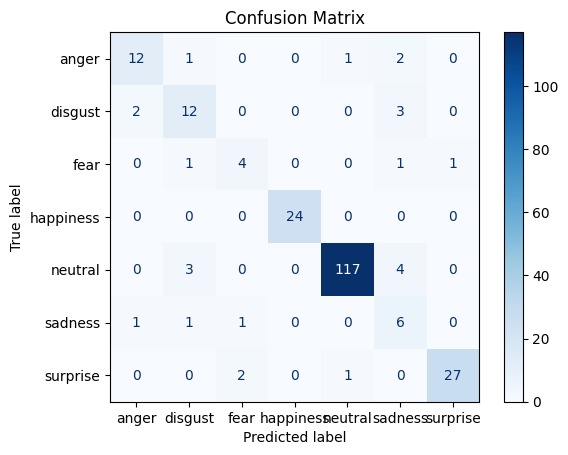

In [ ]:
# === LIBRARIES ===
import os, shutil
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# === DEVICE ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === DATA PREP (CLEAN & MERGE CK + JAFFE) ===
clean_root = '/content/CK_clean'
combined_root = '/content/combined_dataset'
valid_classes = {'anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'}
class_mapping = {'contempt': 'disgust'}

os.makedirs(clean_root, exist_ok=True)
os.makedirs(combined_root, exist_ok=True)

for item in os.listdir('/content'):
    if item in valid_classes and os.path.isdir(os.path.join('/content', item)):
        shutil.move(os.path.join('/content', item), os.path.join(clean_root, item))

for emotion in valid_classes:
    src_dir = os.path.join(clean_root, emotion)
    mapped_emotion = class_mapping.get(emotion, emotion)
    dst_dir = os.path.join(combined_root, mapped_emotion)
    os.makedirs(dst_dir, exist_ok=True)
    if os.path.exists(src_dir):
        for img in os.listdir(src_dir):
            shutil.copy(os.path.join(src_dir, img), os.path.join(dst_dir, img))

jaffe_root = '/content/jaffe/jaffe'
emotion_map = {'AN': 'anger', 'DI': 'disgust', 'FE': 'fear', 'HA': 'happiness', 'NE': 'neutral', 'SA': 'sadness', 'SU': 'surprise'}

for img_name in os.listdir(jaffe_root):
    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.tiff')): continue
    try:
        base_name = img_name.split('.')[1]
        emotion_code = base_name[:2].upper()
        if emotion_code in emotion_map:
            emotion = emotion_map[emotion_code]
            dst_dir = os.path.join(combined_root, emotion)
            os.makedirs(dst_dir, exist_ok=True)
            shutil.copy(os.path.join(jaffe_root, img_name), os.path.join(dst_dir, img_name))
    except Exception: continue

# === TRANSFORM ===
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# === DATASET & SPLIT ===
dataset = ImageFolder(root=combined_root, transform=transform)
num_classes = len(dataset.classes)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# === MODEL (EfficientNet-B0) ===
model = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
model.classifier[1] = nn.Sequential(
    nn.Dropout(0.7),
    nn.Linear(model.classifier[1].in_features, num_classes)
)
model = model.to(device)

# === LOSS & OPTIMIZER ===
criterion = nn.CrossEntropyLoss()  # No class weights
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.002)

# === TRAINING LOOP (NO MIXUP) ===
num_epochs = 50
patience = 7
best_val_loss = float('inf')
patience_counter = 0

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss, correct = 0.0, 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = train_loss / len(train_loader)
    train_acc = 100 * correct / total_train
    train_losses.append(avg_train_loss)
    train_accs.append(train_acc)

    model.eval()
    val_loss, val_correct = 0.0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_correct += (outputs.argmax(1) == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_acc = 100 * val_correct / len(val_subset)
    val_losses.append(avg_val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        torch.save(model, 'best_model_full.pt')
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# === PLOT ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Val Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train vs Val Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# === FINAL EVALUATION ===
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=dataset.classes))
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


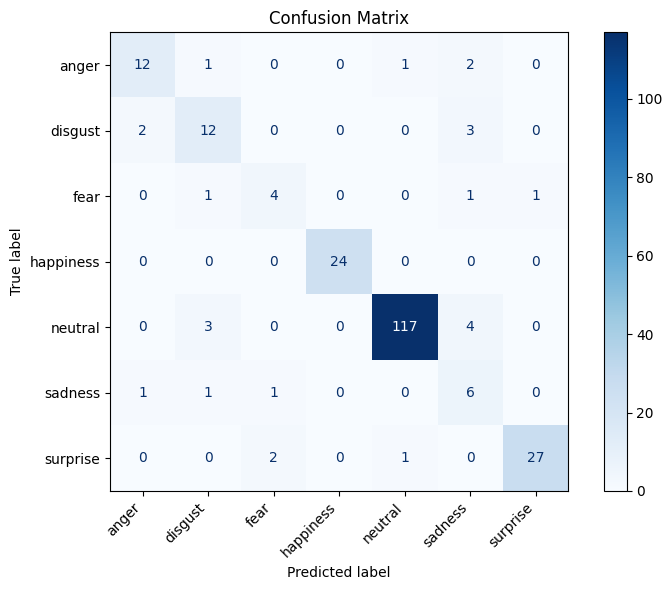

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
fig, ax = plt.subplots(figsize=(8, 6))  # Optional: Increase figure size
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


# the best model

Model with
imbalance handling

Epoch 1, Train Loss: 1.8446, Train Acc: 31.41%, Val Loss: 1.7035, Val Acc: 56.04%
Epoch 2, Train Loss: 1.5401, Train Acc: 56.56%, Val Loss: 1.3054, Val Acc: 59.34%
Epoch 3, Train Loss: 1.3104, Train Acc: 65.40%, Val Loss: 1.1576, Val Acc: 65.93%
Epoch 4, Train Loss: 1.2425, Train Acc: 68.47%, Val Loss: 1.0771, Val Acc: 70.33%
Epoch 5, Train Loss: 1.1465, Train Acc: 72.88%, Val Loss: 1.0321, Val Acc: 72.53%
Epoch 6, Train Loss: 1.1149, Train Acc: 74.48%, Val Loss: 0.9179, Val Acc: 76.92%
Epoch 7, Train Loss: 0.9599, Train Acc: 78.28%, Val Loss: 0.8107, Val Acc: 79.12%
Epoch 8, Train Loss: 0.9909, Train Acc: 79.02%, Val Loss: 0.7929, Val Acc: 76.92%
Epoch 9, Train Loss: 0.9744, Train Acc: 80.49%, Val Loss: 0.7279, Val Acc: 79.12%
Epoch 10, Train Loss: 0.9142, Train Acc: 84.17%, Val Loss: 0.7423, Val Acc: 78.02%
Epoch 11, Train Loss: 0.7607, Train Acc: 86.26%, Val Loss: 0.6284, Val Acc: 82.42%
Epoch 12, Train Loss: 0.8131, Train Acc: 84.66%, Val Loss: 0.6162, Val Acc: 83.52%
Epoch 13, Tra

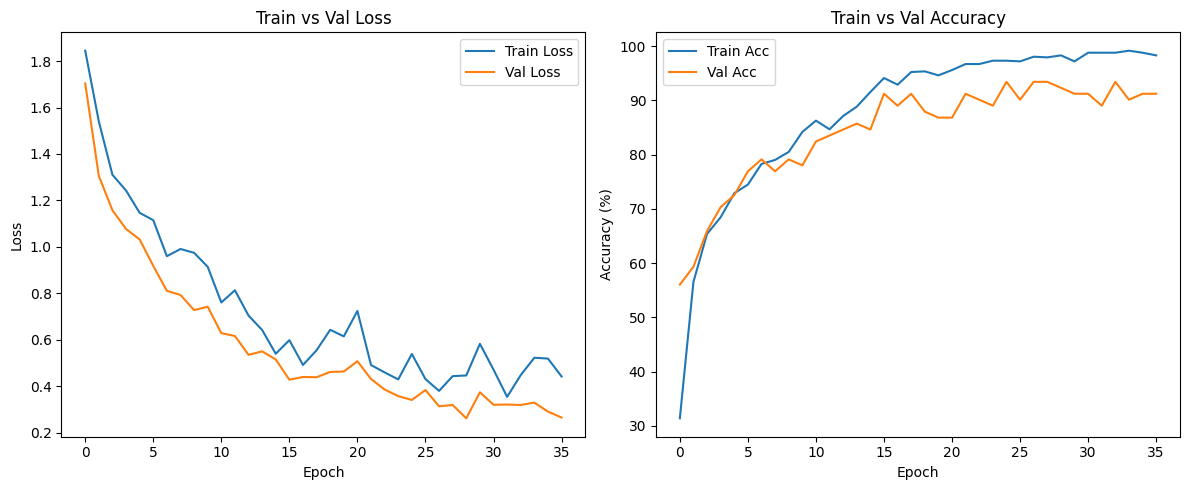

Classification Report:
              precision    recall  f1-score   support

       anger       0.91      0.83      0.87        12
     disgust       0.83      0.83      0.83        24
        fear       0.93      0.87      0.90        15
   happiness       1.00      0.95      0.97        19
     neutral       0.94      0.95      0.94       125
     sadness       0.70      1.00      0.82         7
    surprise       1.00      0.92      0.96        25

    accuracy                           0.93       227
   macro avg       0.90      0.91      0.90       227
weighted avg       0.93      0.93      0.93       227



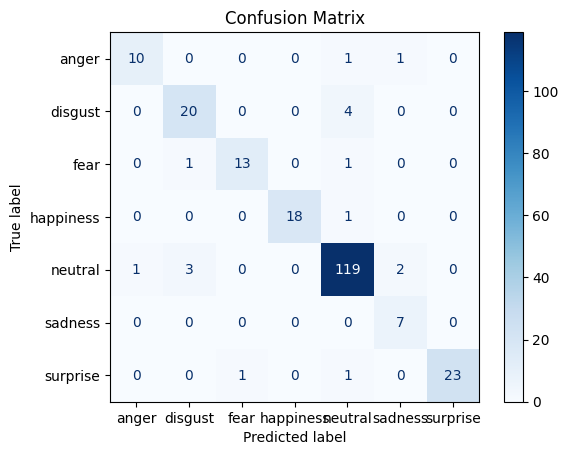

In [ ]:

# === LIBRARIES ===
import os, shutil
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split, WeightedRandomSampler
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# === DEVICE ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === PREPARE DATA ===
clean_root = '/content/CK_clean'
combined_root = '/content/combined_dataset'
valid_classes = {'anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'}
class_mapping = {'contempt': 'disgust'}

os.makedirs(clean_root, exist_ok=True)
os.makedirs(combined_root, exist_ok=True)

for item in os.listdir('/content'):
    if item in valid_classes and os.path.isdir(os.path.join('/content', item)):
        shutil.move(os.path.join('/content', item), os.path.join(clean_root, item))

for emotion in valid_classes:
    src_dir = os.path.join(clean_root, emotion)
    mapped_emotion = class_mapping.get(emotion, emotion)
    dst_dir = os.path.join(combined_root, mapped_emotion)
    os.makedirs(dst_dir, exist_ok=True)
    if os.path.exists(src_dir):
        for img in os.listdir(src_dir):
            shutil.copy(os.path.join(src_dir, img), os.path.join(dst_dir, img))

jaffe_root = '/content/jaffe/jaffe'
emotion_map = {'AN': 'anger', 'DI': 'disgust', 'FE': 'fear', 'HA': 'happiness', 'NE': 'neutral', 'SA': 'sadness', 'SU': 'surprise'}

for img_name in os.listdir(jaffe_root):
    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.tiff')): continue
    try:
        base_name = img_name.split('.')[1]
        emotion_code = base_name[:2].upper()
        if emotion_code in emotion_map:
            emotion = emotion_map[emotion_code]
            dst_dir = os.path.join(combined_root, emotion)
            os.makedirs(dst_dir, exist_ok=True)
            shutil.copy(os.path.join(jaffe_root, img_name), os.path.join(dst_dir, img_name))
    except Exception: continue

# === TRANSFORM ===
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

dataset = ImageFolder(root=combined_root, transform=transform)
class_counts = Counter(dataset.targets)
num_classes = len(dataset.classes)

# === SPLIT ===
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# === SAMPLER ===
train_indices = train_subset.indices
train_labels = [dataset.targets[idx] for idx in train_indices]
class_counts_train = Counter(train_labels)
weights = [1.0 / (class_counts_train[label] ** 0.5) for label in train_labels]
sampler = WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

train_loader = DataLoader(train_subset, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# === MODEL (EfficientNet-B0) ===
model = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
model.classifier[1] = nn.Sequential(
    nn.Dropout(0.7),
    nn.Linear(model.classifier[1].in_features, num_classes)
)
model = model.to(device)

# === LOSS FUNCTION (log-smoothed class weights) ===
counts = np.array([class_counts[i] for i in range(num_classes)])
class_weights = 1.0 / np.log1p(counts)
class_weights = torch.FloatTensor(class_weights / class_weights.sum() * num_classes).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.002)

# === MIXUP FUNCTION ===
def mixup_data(x, y, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# === TRAINING LOOP WITH TRACKING AND PLOTTING ===
num_epochs = 50
patience = 7
best_val_loss = float('inf')
patience_counter = 0

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss, correct = 0.0, 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        inputs, targets_a, targets_b, lam = mixup_data(images, labels)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lam * criterion(outputs, targets_a) + (1 - lam) * criterion(outputs, targets_b)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        with torch.no_grad():
            main_outputs = model(images)
            correct += (main_outputs.argmax(1) == labels).sum().item()
            total_train += labels.size(0)

    avg_train_loss = train_loss / len(train_loader)
    train_acc = 100 * correct / total_train
    train_losses.append(avg_train_loss)
    train_accs.append(train_acc)

    model.eval()
    val_loss, val_correct = 0.0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_correct += (outputs.argmax(1) == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_acc = 100 * val_correct / len(val_subset)
    val_losses.append(avg_val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        torch.save(model, 'best_model_full.pt')
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# === PLOT TRAINING AND VALIDATION CURVES ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Val Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train vs Val Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# === EVALUATION ===
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=dataset.classes))
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Class imbalance

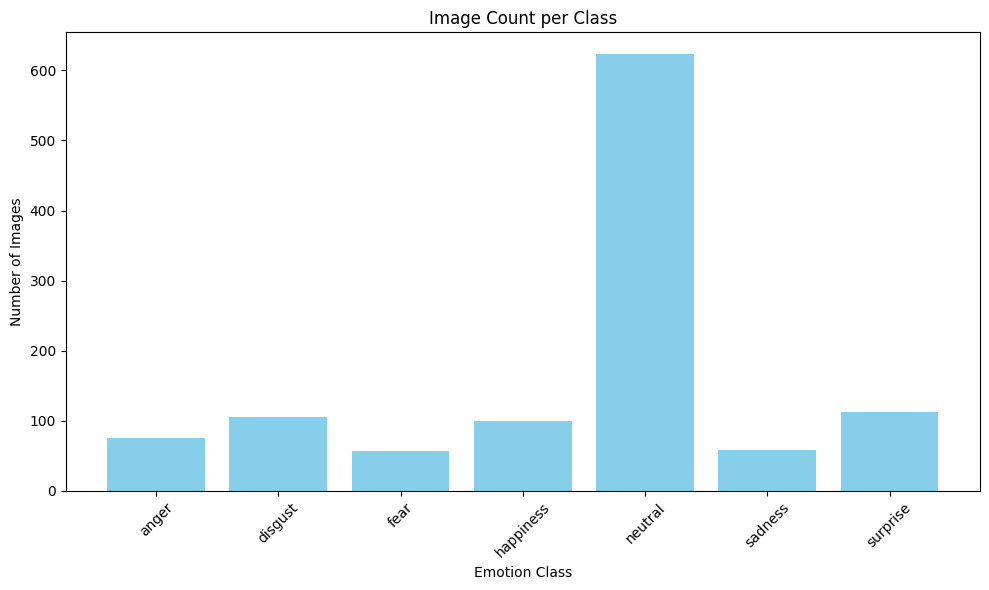

In [ ]:
import os
import matplotlib.pyplot as plt

# Root directory where your dataset is organized by class folders
combined_root = '/content/combined_dataset'

# Count images per class
class_counts = {}
for class_name in sorted(os.listdir(combined_root)):
    class_path = os.path.join(combined_root, class_name)
    if os.path.isdir(class_path):
        num_images = len([
            fname for fname in os.listdir(class_path)
            if fname.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))
        ])
        class_counts[class_name] = num_images

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Images')
plt.title('Image Count per Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
